**PCA**: Dimenssion reduction

Principal Component Analysis is a versatile and powerful technique for dimensionality reduction and feature extraction. By transforming complex, high-dimensional datasets into a more manageable form, PCA aids in data exploration, visualization, and analysis. Its mathematical underpinnings, coupled with its diverse applications, make PCA an indispensable tool in the toolkit of data scientists and analysts worldwide. Understanding the principles and mathematics behind PCA is essential for harnessing its full potential in real-world data analysis tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

* Utils

In [2]:
def kmer_count(sequence, k=3, step=1):
    kmers_count = {}
    s = 0
    for i in range(0, len(sequence) - k + 1, step):
        kmer = sequence[i:i + k]
        s += 1
        if kmer in kmers_count:
            kmers_count[kmer] += 1
        else:
            kmers_count[kmer] = 1
    for key, value in kmers_count.items():
        kmers_count[key] = value / s

    return kmers_count

* Load dataset

In [3]:
dataset = pd.read_csv("./Output/Arabidopsis_thaliana_GHLH_and_CYP_gene.csv")

In [89]:
k = 5
sequences   = dataset['sequence']
kmers_count = []
for i in range(len(sequences)):
    kmers_count.append(kmer_count(sequences[i], k=k, step=1))

In [90]:
v = DictVectorizer(sparse=False)
feature_values = v.fit_transform(kmers_count)
feature_names = v.get_feature_names_out()
X = pd.DataFrame(feature_values, columns=feature_names)
X.head()

,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,0.003053,0.000872,0.003053,0.001308,0.002617,0.002181,0.000436,0.003489,0.002181,0.001744,...,0.001308,0.003925,0.001744,0.002181,0.003925,0.002181,0.004361,0.002617,0.005233,0.005669
1,0.008850,0.001361,0.000681,0.008850,0.001361,0.000681,0.000681,0.002042,0.002042,0.000000,...,0.000681,0.009530,0.001361,0.002042,0.001361,0.002042,0.004765,0.007488,0.003404,0.010211
2,0.002031,0.001354,0.002370,0.002031,0.002370,0.001693,0.000339,0.003385,0.004401,0.001693,...,0.000677,0.006432,0.003724,0.000677,0.002370,0.004401,0.002370,0.003724,0.004739,0.006432
3,0.008632,0.001363,0.003635,0.001817,0.001817,0.001817,0.000454,0.001363,0.004089,0.000909,...,0.001363,0.006361,0.001817,0.003635,0.001363,0.002272,0.007269,0.006361,0.002272,0.009087
4,0.004514,0.003009,0.002006,0.002006,0.003009,0.000502,0.000502,0.002006,0.003009,0.004012,...,0.001003,0.004514,0.001505,0.001003,0.004012,0.004514,0.004514,0.003009,0.004012,0.011033


In [91]:
y = dataset['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

* PCA

In [92]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
# Step 2: Perform PCA
threshold = 0.95
c=int( threshold * min(4**k, X.shape[0]) )
pca = PCA(n_components=c)
X_pca = pca.fit_transform(X_scaled)

In [94]:
c

361

In [95]:
# Step 3: Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance_ratio = pca.explained_variance_ratio_
#print("Explained variance by each component: ", explained_variance)
#print("Cumulative explained variance: ", np.cumsum(explained_variance))
print(f"Cumulative explained variance ratio: {np.sum(explained_variance_ratio)*100}%", )

Cumulative explained variance ratio: 99.66759219557916%


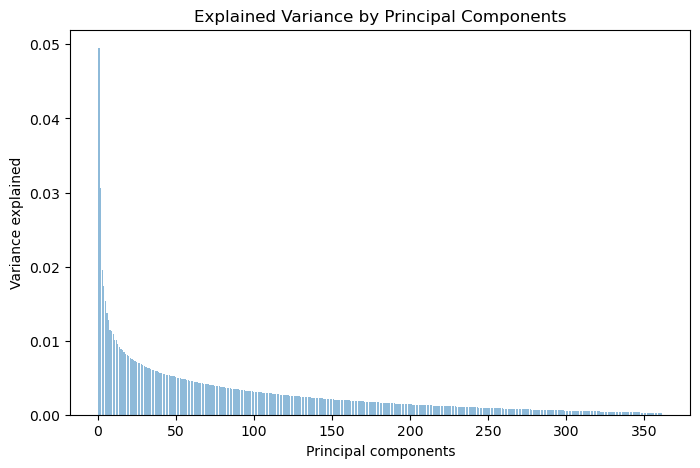

In [96]:
# Step 4: Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Variance explained')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.show()

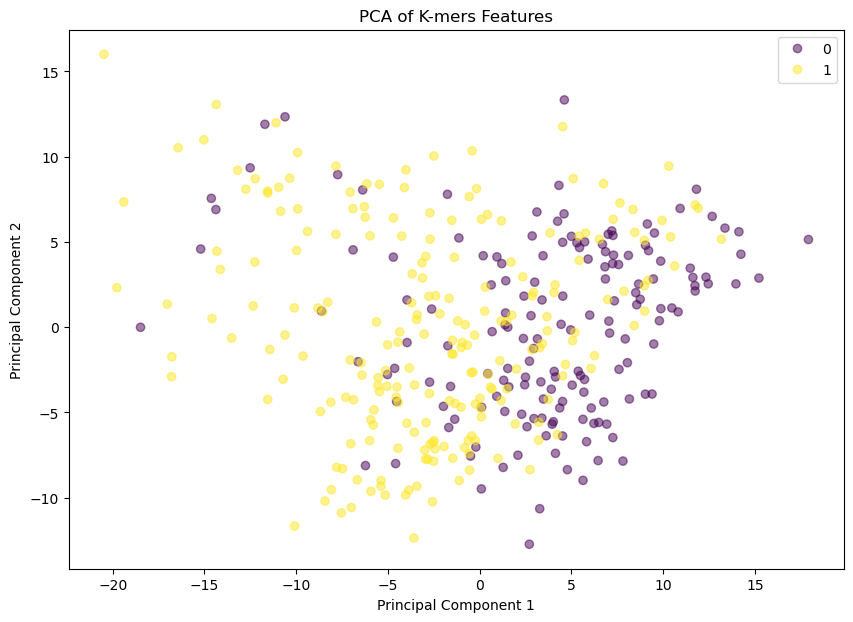

In [97]:
# Step 5: Visualize the PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of K-mers Features')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y))
plt.show()

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

print("Shapes of train/test splits:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

result = []
path_result=f'./Output/PCA/result_k_{k}.csv'

Shapes of train/test splits:
X_train: (304, 361)
X_test: (76, 361)
y_train: (304,)
y_test: (76,)


* <span style="color:red">Model 1</span>

In [99]:
model1 = LogisticRegression()#GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [100]:
def train_test(model, X, y, out=""):
    stratified_kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model1, X, y, cv=stratified_kfold, scoring='accuracy')
    print("[ALL_FEATURE] -- Cross-validated accuracy: {:.4f} ± {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

    # Fit the model
    model.fit(X, y)

    # Test
    predictions = model.predict(X_test)
    print("[Test]  - '{}' - acc : {}".format(model.__class__.__name__, accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions), end="\n")

    # Save
    result.append({
        'name': model.__class__.__name__,
        'model': model,
        'score': accuracy_score(y_test, predictions),
        'feature_selection_method': "PCA",
        'k-mer': k,
        'feature': "first " + str(threshold * min(4**k, X.shape[0])) + " most informative"
    })
    df_performance = pd.DataFrame(result)
    df_performance.to_csv(out, index=False)

In [101]:
train_test(model1, X_train, y_train, out=path_result)

[ALL_FEATURE] -- Cross-validated accuracy: 0.8878 ± 0.0523
[Test]  - 'LogisticRegression' - acc : 0.9342105263157895
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.98      0.91      0.94        44

    accuracy                           0.93        76
   macro avg       0.93      0.94      0.93        76
weighted avg       0.94      0.93      0.93        76



* <span style="color:red">Model 2</span>

In [102]:
model2 = RandomForestClassifier(max_depth=128, max_features=16, n_estimators=300)

In [103]:
train_test(model2, X_train, y_train, out=path_result)

[ALL_FEATURE] -- Cross-validated accuracy: 0.8878 ± 0.0523
[Test]  - 'RandomForestClassifier' - acc : 0.75
              precision    recall  f1-score   support

           0       0.84      0.50      0.63        32
           1       0.72      0.93      0.81        44

    accuracy                           0.75        76
   macro avg       0.78      0.72      0.72        76
weighted avg       0.77      0.75      0.73        76



* <span style="color:red">Model 3</span>

In [104]:
model3 = SVC(kernel='linear',  C=0.1, gamma=0.001)

In [105]:
train_test(model3, X_train, y_train, out=path_result)

[ALL_FEATURE] -- Cross-validated accuracy: 0.8878 ± 0.0523
[Test]  - 'SVC' - acc : 0.9605263157894737
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.93      0.96        44

    accuracy                           0.96        76
   macro avg       0.96      0.97      0.96        76
weighted avg       0.96      0.96      0.96        76



**Note:**

Kernel: Perte d'interpretatbilité - coyche d'abstraction; - PCA: Reduit encore plus la couche d'interpretatibilité; haute dimension: k features-> pour etre sur suff donnée : 10^K observations; trop degré de liberté; 

* Explicabilité: feature selection
* PCA: Ne marche pas toujours et perte de dimension; des oroblem non lineaires (problem);
* TSNE, DBNSan; KernelPCA(méthode non-linéaire)